# Stationarity, MA(q) and AR(p) processes

> We will introduce few important notions in time series analysis: Stationarity, Backward shift operator, Invertibility, and Duality. We begin to explore Autoregressive processes and Yule-Walker equations.This is the Summary of lecture "Practical Time Series Analysis" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [R, Coursera, Time_Series_Analysis]
- image: 

In [1]:
options(repr.plot.width = 16, repr.plot.height = 9)

## Stationarity - Generalizing from an individual to a group

### Stationarity - White Noise and Random Walks

#### White noise is Stationary

Consider a discrete family of independent, identically distributed normal random variables (often Gaussian)

$$ X_t \sim iid(0, \sigma^2) $$
$$ X_t \sim iid N(0, \sigma^2) $$

Mean function $\mu(t) = 0$ is obviously constant, so consider

$$ \gamma(t_1, t_2) = \begin{cases} 0 \quad t_1 \neq t_2 \\ \sigma^2 \quad t_1 = t_2 \end{cases} $$

#### Random Walks are not stationary!

Started with IID Random variables $Z_t \sim iid (\mu, \sigma^2)$

Build a walk with $t$ steps

$$ X_1 = Z_1 \\ X_2 = X_1 + Z_2 = Z_1 + Z_2 \\
X_3 = X_2 + Z_3 = Z_1 + Z_2 + Z_3 \\ \vdots \\
X_t = X_{t-1} + Z_t = \sum_{i=1}^t Z_i $$

$$ \mathbb{E}[X_t] = \mathbb{E}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{E}[Z_i] = t \cdot \mu \\
 \mathbb{V}[X_t] = \mathbb{V}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{V}[Z_i] = t \cdot \sigma^2 $$
 
> Note: Independent random variables have variances which add. All random variables have means which add.

#### Moving Average Processes are Stationary!

Start with IID random variables $Z_t \sim iid(0, \sigma^2)$

$$ MA(q)\text{ process: } \qquad X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \cdots + \beta_q Z_{t-q} $$

$q$ tells us how far back to look along the white noise sequence for our weighted average.

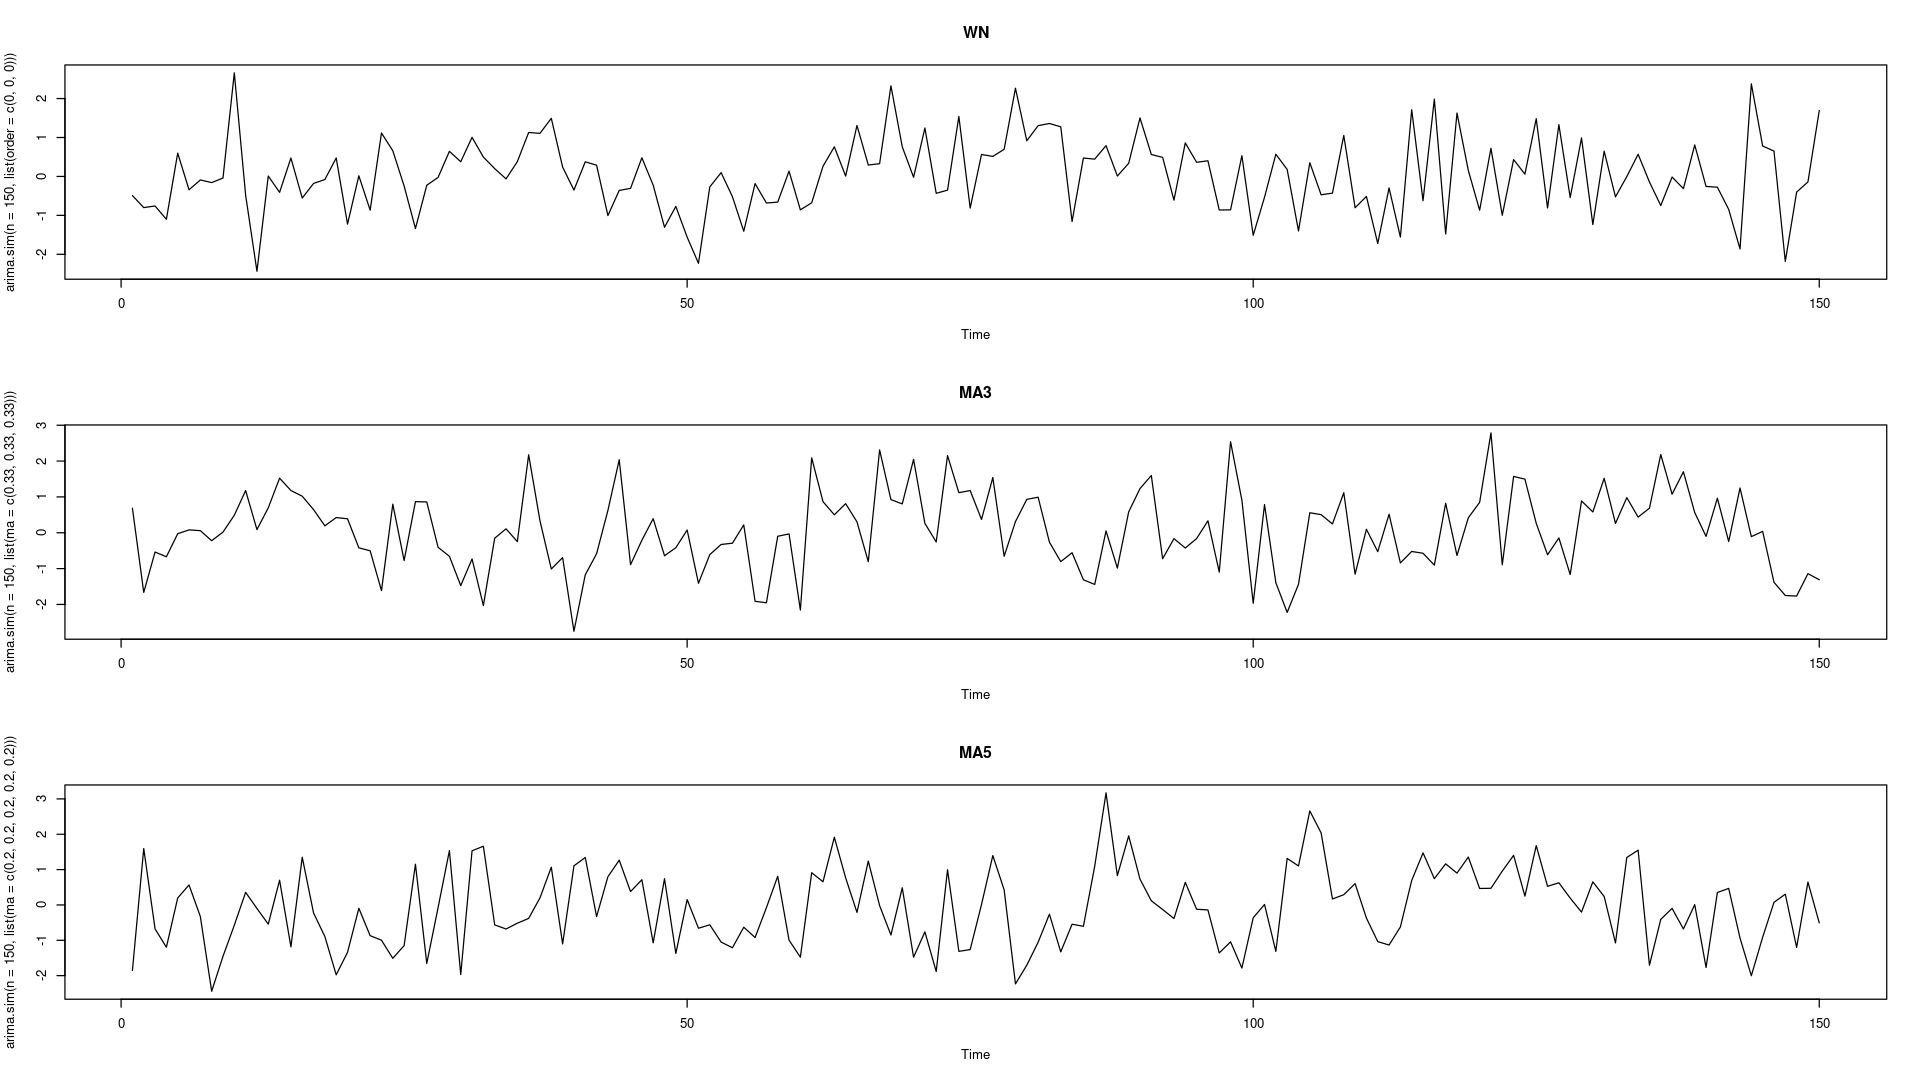

In [2]:
par(mfrow=c(3,1))
plot( arima.sim(n=150, list(order=c(0,0,0) )  ), main="WN" );
plot( arima.sim(n=150, list(ma=c(0.33, 0.33, 0.33)      )  ) , main="MA3");
plot( arima.sim(n=150, list(ma=c(0.2, 0.2, 0.2, 0.2, 0.2) )  ), main="MA5" );

### Stationarity - ACF of Moving Average

#### Moving Average Processes are stationary!

Look at the covariance at two locations along a moving average process:

$$ cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] - \mathbb{E}[X_t] \mathbb{E}[X_{t+k}] \\
\mathbb{E}[X_t] = \mathbb{E}[X_{t+k}] = 0 \Rightarrow cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] \\ 
cov[X_t, X_{t+k}] = \mathbb{E}[(\beta_0 Z_t + \cdots + \beta_q Z_{t-q}) \cdot (\beta_0 Z_{t+k} + \cdots + \beta_q Z_{t+l-q})]$$

### Series and Series Representation

#### Sequence and series
- Sequence $\{a_n\}$ is list of numbers in definite order

$$ a_1, a_2, a_3, \dots, a_n, $$

- If the limit of the sequence exists, i.e.

$$ \lim_{n \to \infty} a_n = a $$

then we say the sequence is convergent.

#### Partial sums
Partial sums of a sequence $\{a_n\}$ are defined as

$$ s_n = a_1 + a_2 + \dots + a_n $$

#### Series

- If the partial sums $\{s_n\}$ is convergent to a number $s$, then we say the infinite series $\sum_{k=1}^{\infty}a_k$ is convergent, and is equal to $s$.

$$ \sum_{k=1}^{\infty} a_k = \lim_{n \to \infty} s_n  = \lim_{n \to \infty}(a_1 + a_2 + \dots + a_n) = s $$

- Otherwise, we say $\sum_{k=1}^{\infty}a_k$ is divergent.

#### Absolute convergence

- Series is absolutely convergent if

$$ \sum_{k=1}^{\infty} \vert a_k \vert $$

is convergent.

- Absolute convergence implies convergence.

#### Convergence tests

- Integral test
- Comparison test
- Limit comparision test
- Alternating series test
- Ratio test
- Root test

#### Geometric series

- Geometric sequence

$$ \{a r^{n-1}\}_{n=1}^{\infty} = \{a, ar, ar^2, ar^3, \dots\} $$

- Geometric series

$$ \sum_{k=1}^{\infty} a r^{k-1} = \frac{a}{1 - r} \quad \text{if } \vert r \vert < 1 $$

#### Series representation

- Series representation for $\frac{1}{1 - x}$ where $a = 1, r = x$.

$$ \frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots \quad \text{ if } \vert x \vert < 1$$

- Series representation for $\frac{1}{(1-x)(1-\frac{x}{2})}$

$$ \frac{1}{(1-x)(1-\frac{x}{2})} = \frac{2}{(1 - x)} + \frac{-1}{1 - \frac{x}{2}} = \sum_{k=0}^{\infty}(2 - \frac{1}{2^k}) x^k \\
\text{if } \vert x \vert < 1 \text{ and } \vert \frac{x}{2} \vert < 1$$

#### Complex functions

Assume $z$ is a complex number

$$ \frac{a}{1-z} = a + az + az^2 + \dots = \sum_{k=1}^{\infty}az^{k-1} \quad \text{ if } \vert z \vert < 1 $$

### Backward shift operator

#### Definition

- $X_1, X_2, X_3, \dots $
- **Backward shift operator** is defined as

$$ BX_t = X_{t-1} $$

- $B^2 X_t = B B X_t = B X_{t-1} = X_{t-2} $
- $B^k X_t = X_{t-k}$

#### Example - Random walk

$$ X_t = X_{t-1} + Z_t \\
X_t = B X_{t} + Z_t \\ 
(1 - B)X_t = Z_t \\
\phi(B)X_t = Z_t \\
\text{where } \phi(B) = 1 - B $$

#### MA(q) process (with a drift)

$$ X_t = \mu + \beta_0 Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q} $$

Then,

$$ X_t = \mu + \beta_0 Z_t + \beta_1 B^1 Z_{t-1} + \dots + \beta_q B^q Z_{t-q} \\
 X_t - \mu = \beta(B)Z_t $$
 
where,

$$ \beta(B) = \beta_0 + \beta_1 B + \dots + \beta_q B^q $$

### Introduction to Invertibility

#### Two MA(1) models
- Model 1

$$ X_t = Z_t + 2 Z_{t-1} $$

- Model 2

$$ X_t = Z_t + \frac{1}{2} Z_{t-1} $$

#### Theoretical Auto Covariance function of Model 1

$$ \gamma(k) = Cov[X_{t+k}, X_t] = Cov[Z_{t+k} + 2 Z_{t+k-1}, Z_t + 2 Z_{t-1}] $$

If $k > 1$, then $t + k - 1 > t$, so all $Z$'s are uncorrelated, thus $\gamma(k)$ = 0.

If $k = 0$, then

$$\begin{aligned} \gamma(0) &= Cov[Z_t + 2Z_{t-1}, Z_t + 2 Z_{t-1}] \\
&= Cov[Z_t, Z_t] + 4 Cov[Z_{t-1}, Z_{t-1}] = \sigma_z^2 + 4 \sigma_z^2 = 5 \sigma_z^2 \end{aligned} $$

If $k = 1$, then

$$ \gamma(1) = Cov[Z_{t+1} + 2 Z_t, Z_t + 2 Z_{t-1}] = Cov[2Z_t, Z_t] = 2 \sigma_z^2 $$

If $k < 0$, then

$$ \gamma(k) =\gamma(-k) $$

#### Auto Covariance Function and ACF of Model 1

Then, since $\rho(k) = \frac{\rho(k)}{\rho(0)}$,

$$ \rho(k) = \begin{cases} 0, \quad k > 1 \\
\frac{2}{5}, \quad k = 1 \\
1, \quad k = 0 \\
\rho(-k) \quad k < 0 \end{cases} $$

#### ACF of Model 2

$$ \rho(k) = \begin{cases} 0, \quad k > 1 \\
 \frac{2}{5}, \quad k = 1 \\
 1, \quad k = 0 \\
 \rho(-k), \quad k < 0 \end{cases} $$

#### Inverting through backward substitution

MA(1) process

$$ X_t = Z_t + \beta Z_{t-1} \\
 Z_t = X_t - \beta Z_{t-1} = X_t - \beta (X_{t-1} - \beta Z_{T-2}) = X_t - \beta X_{t-1} + \beta^2 Z_{t-2} $$
In this manner,

$$ Z_t = X_t - \beta X_{t-1} + \beta^2 X_{t-2} - \beta^3 X_{t-3} + \dots $$

i.e.

$$ X_t = Z_t + \beta X_{t-1} - \beta^2 X_{t-2} + \beta^3 X_{t-3} + \dots $$

We 'inverted' MA(1) process to AR($\infty$)

#### Inverting using Backward shift operator

$$ X_t = \beta(B) Z_t $$
where,

$$ \beta(b) = 1 + \beta B $$

Then, we find $Z_t$ by inverting the polynomial operator $\beta(B)$:

$$ \beta(B)^{-1} X_t = Z_t $$

#### Inverse of $\beta(B)$

$$ \beta(B)^{-1} = \frac{1}{1 + \beta B} = 1 - \beta B + \beta^2 B^2 - \beta^3 B^3 + \dots $$

Here we expand the inverse of the polynomial operator as a 'rational function where $\beta B$ is a complex number.

Thus we obtain,

$$ \beta (B)^{-1} X_t = X_t - \beta X_{t-1} + \beta^2 X_{t-2} - \beta^3 X_{t-3} + \dots $$

$$ Z_t = \sum_{n=0}^{\infty}(-\beta)^n X_{t-n} $$

In order to make sure that the sum on the right is convergent (in the Mean-square sense), we need $\vert \beta \vert < 1$.

#### Invertibility - Definition

- $\{X_t\}$ is a stochastic process
- $\{Z_t\}$ is innovations, i.e random distribution or white nose.
- $\{X_t\}$ is called *invertible*, if $Z_t = \sum_{k=0}^{\infty} \pi_k X_{t-k}$ where $\sum_{k=0}^{\infty} \vert \pi_k \vert $ is convergent.

### Duality

#### MA(q) process

$$ X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q} $$

Using Backward shift operator,

$$ X_t = ( \beta_0 + \beta_1 B+ \dots + \beta_q B^q) Z_t = \beta(B) Z_t $$

We obtain innovations $Z_t$ in terms of present and past values of $X_t$,

$$ Z_t = \beta (B)^{-1} X_t = (\alpha_0 + \alpha_1 B + \alpha_2 B^2+ \dots ) X_t $$

For this to hold, "complex roots of the polynomial $\beta(B)$ must lie outside ot the unit circle where $B$ is regarded as complex variable".

#### Invertibility condition for MA(q)

MA(q) process is invertible if the roots of the polynomial

$$ \beta(B) = \beta_0 + \beta_1 B + \dots + \beta_q B^q $$

all lie outside the unit circle, where we regard $B$ as a complex variable (not an operator)

#### MA(1) process

- $X_t = Z_t + \beta Z_{t-1} $

- $\beta(B) = 1 + \beta B$

- In this case, only one (real) root $B = - \frac{1}{\beta}$

- $\vert - \frac{1}{\beta} > 1 \to \vert \beta \vert < 1$

- Then, $Z_t = \sum_{k=0}^{\infty} (-\beta)^k B^k X_t = \sum_{k=0}^{\infty}(-\beta)^k X_{t-k}$

#### MA(2) process

$$ X_t = Z_t + \frac{5}{6} Z_{t-1} + \frac{1}{6} Z_{t-2} $$

then,

$$ X_t = \beta(B) Z_t $$

where,

$$ \beta (B) = 1 + \frac{1}{6} B + \frac{1}{6} B^2 $$

$$ 1 + \frac{5}{6} z + \frac{1}{6} z^2 = 0 \\
 z_1 = -\frac{1}{2}, z_2 = -\frac{1}{3} $$
 
$$ \begin{aligned} \beta (B)^{-1} &= \frac{1}{1 + \frac{5}{6} B + \frac{1}{6} B^2} = \frac{3}{1 + \frac{1}{2} B} - \frac{2}{1 + \frac{1}{3} B} \\
 &= \sum_{k=0}^{\infty} [ 3 (-\frac{1}{2})^k - 2 (-\frac{1}{3})^k] B^k \end{aligned} $$
 
$$ \begin{aligned} Z_t &= \sum_{k=0}^{\infty} [ 3 (-\frac{1}{2})^k - 2 (-\frac{1}{3})^k] B^k X_t \\ 
  &= \sum_{k=1}^{\infty} \pi_k B^k X_t = \sum_{k=1}^{\infty} \pi_k X_{t-k} \end{aligned} $$
  
where,

$$ \pi_k = 3(-\frac{1}{2})^k - 2(-\frac{1}{3})^k $$

As a result,

MA(2) process $\to$ AR($\infty$) process

#### Stationary condition for AR(p)

AR(p) process

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_{p} X_{t-p} + Z_t $$

is (weakly) stationary if the roots of the polynomial

$$ \phi(B) = 1 - \phi_1 B - \phi_2 B^2 - \dots - \phi_p B^p $$

all lie outside the unit circle, where we regard $B$ as a complex variable (not an operator).

#### AR(1) process
$$ X_t = \phi_1 X_{t-1} + Z_t \to (1 - \phi_1 B)X_t = Z_t \\
 \phi(B) = 1 - \phi_1 B \\
 \phi(z) = 1 - \phi_1 z = 0 \Rightarrow z = \frac{1}{\phi_1}$$

Thus, when $\vert \phi_1 \vert < 1$, the AR(1) process is stationary.

$$ X_t = \frac{1}{1 - \phi_1 B} Z_t = (1 - \phi_1 B - \phi_2 B^2 - \dots) Z_t = \sum_{k=0}^{\infty} \phi_1^k Z_{t-k} $$

#### Another look at $\phi_1$

Take variance from both side,

$$Var[X_t] = Var[\sum_{k=0}^{\infty} \phi_1^k Z_{t-k}] = \sum_{k=0}^{\infty} \phi_1^{2k} \sigma_Z^2 = \sigma_Z^2 \sum_{k=0}^{\infty} \phi_1^{2k} $$

which is a convergent geometric series if $\vert \phi_1^2 \vert < 1$, i.e.

$$ \vert \phi_1 \vert < 1 $$

As a result

AR(p) process $\to$ MA($\infty$) process

#### Duality between AR and MA processes

Under invertibility condition of MA(q),

$$ MA(q) \Rightarrow AR(\infty) $$

Under stationarity condition of AR(p),

$$ AR(p) \Rightarrow MA(\infty) $$

### Mean Square Convergence (Optional)


#### Mean Square convergence

Let 

$$ X_1, X_2, X_3, \dots $$

be a sequence of random variables (i.e. a stochastic process).

We say $X_n$ converge to a random variable $X$ in the mean-square sense if

$$ \mathbb{E}[(X_n - X)^2] \to 0 \text{ as } n \to \infty $$





#### MA(1) model

We inverted MA(1) model

$$ X_t = Z_t + \beta Z_{t-1} $$

as 

$$ Z_t = \sum_{k=0}^{\infty} (-\beta)^k X_{t-k} $$

Infinite sum above is convergent in mean-square sense under some condition on $\beta$

### Autoregressive Processes - Definition, Simulation, and First Examples


#### Simulate an AR(1)

In [3]:
set.seed(2016);
N = 1000;
phi = .4;

In [4]:
Z = rnorm(N, 0, 1);
X = NULL;
X[1] = Z[1];

for (t in 2:N){
    X[t] = Z[t] + phi * X[t - 1];
}

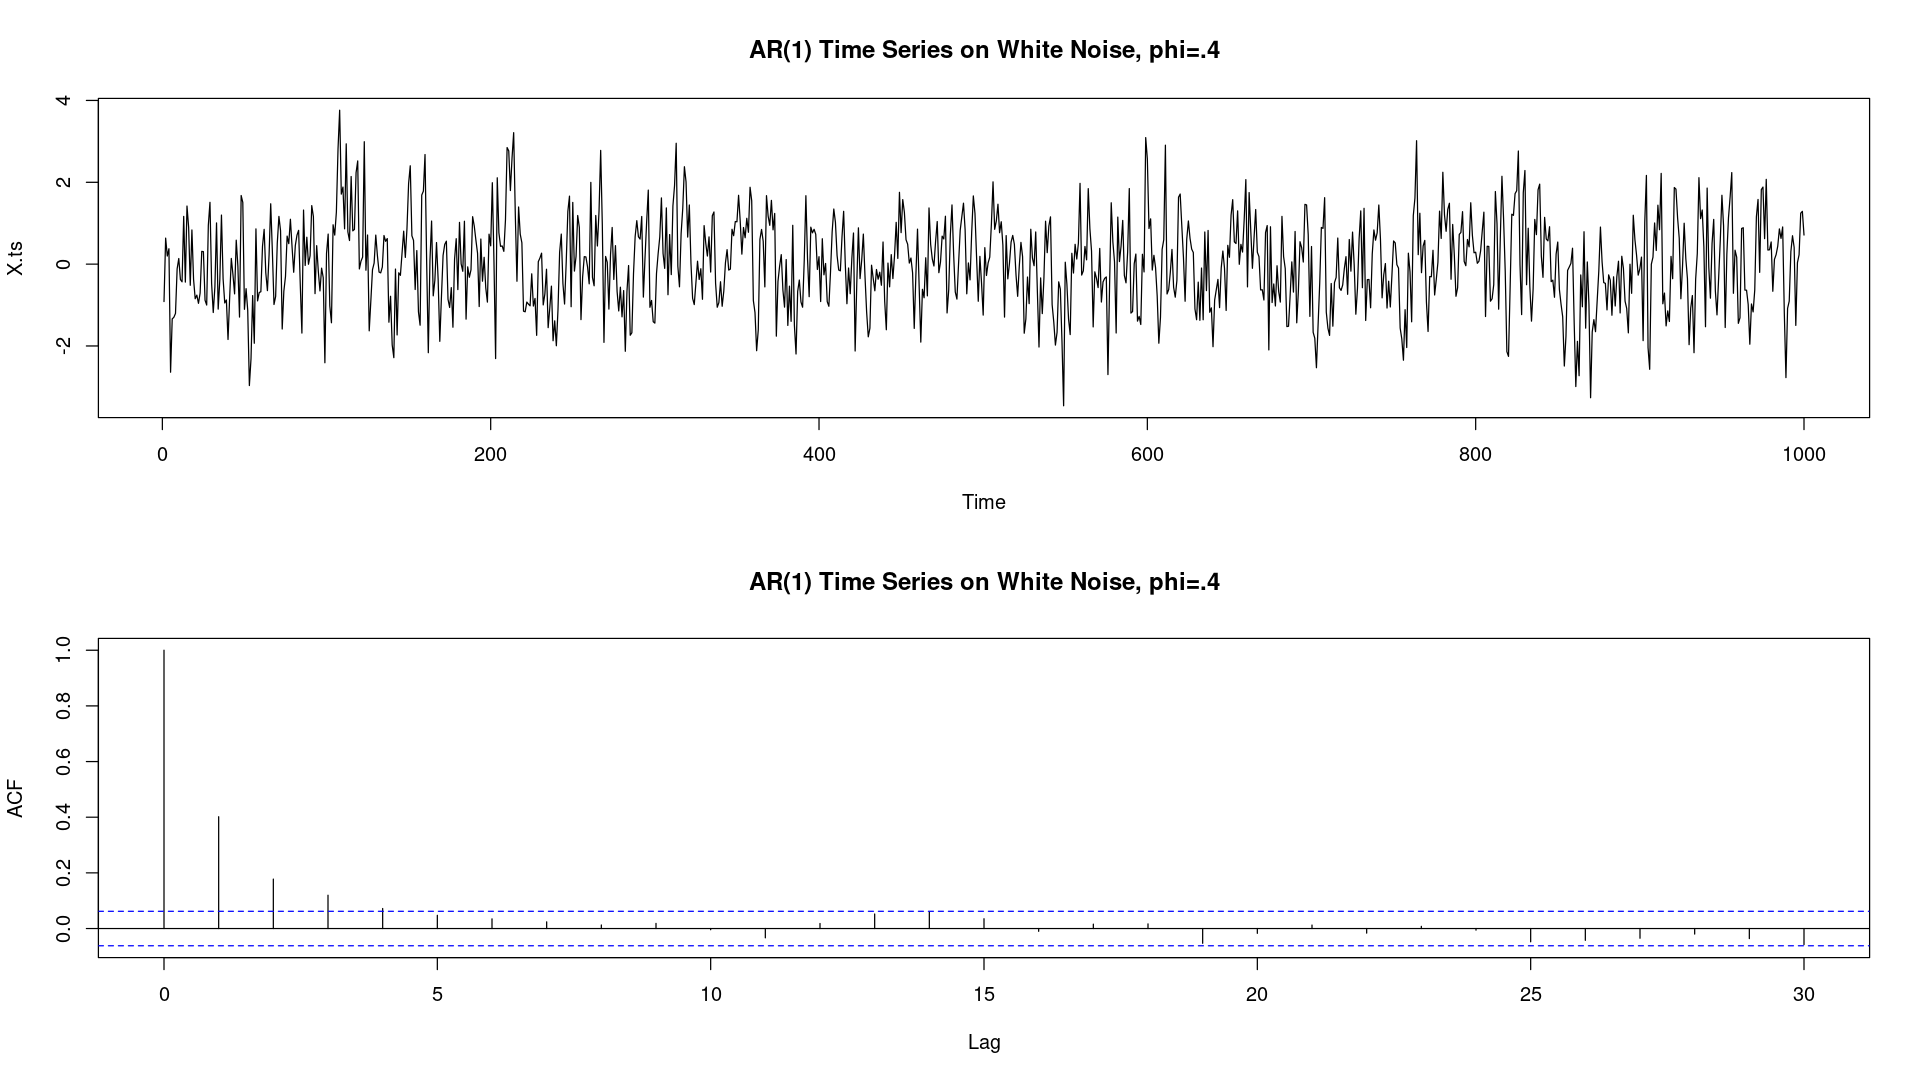

In [5]:
X.ts = ts(X)

par(mfrow=c(2, 1))
plot(X.ts, main='AR(1) Time Series on White Noise, phi=.4')
X.acf = acf(X.ts, main='AR(1) Time Series on White Noise, phi=.4')

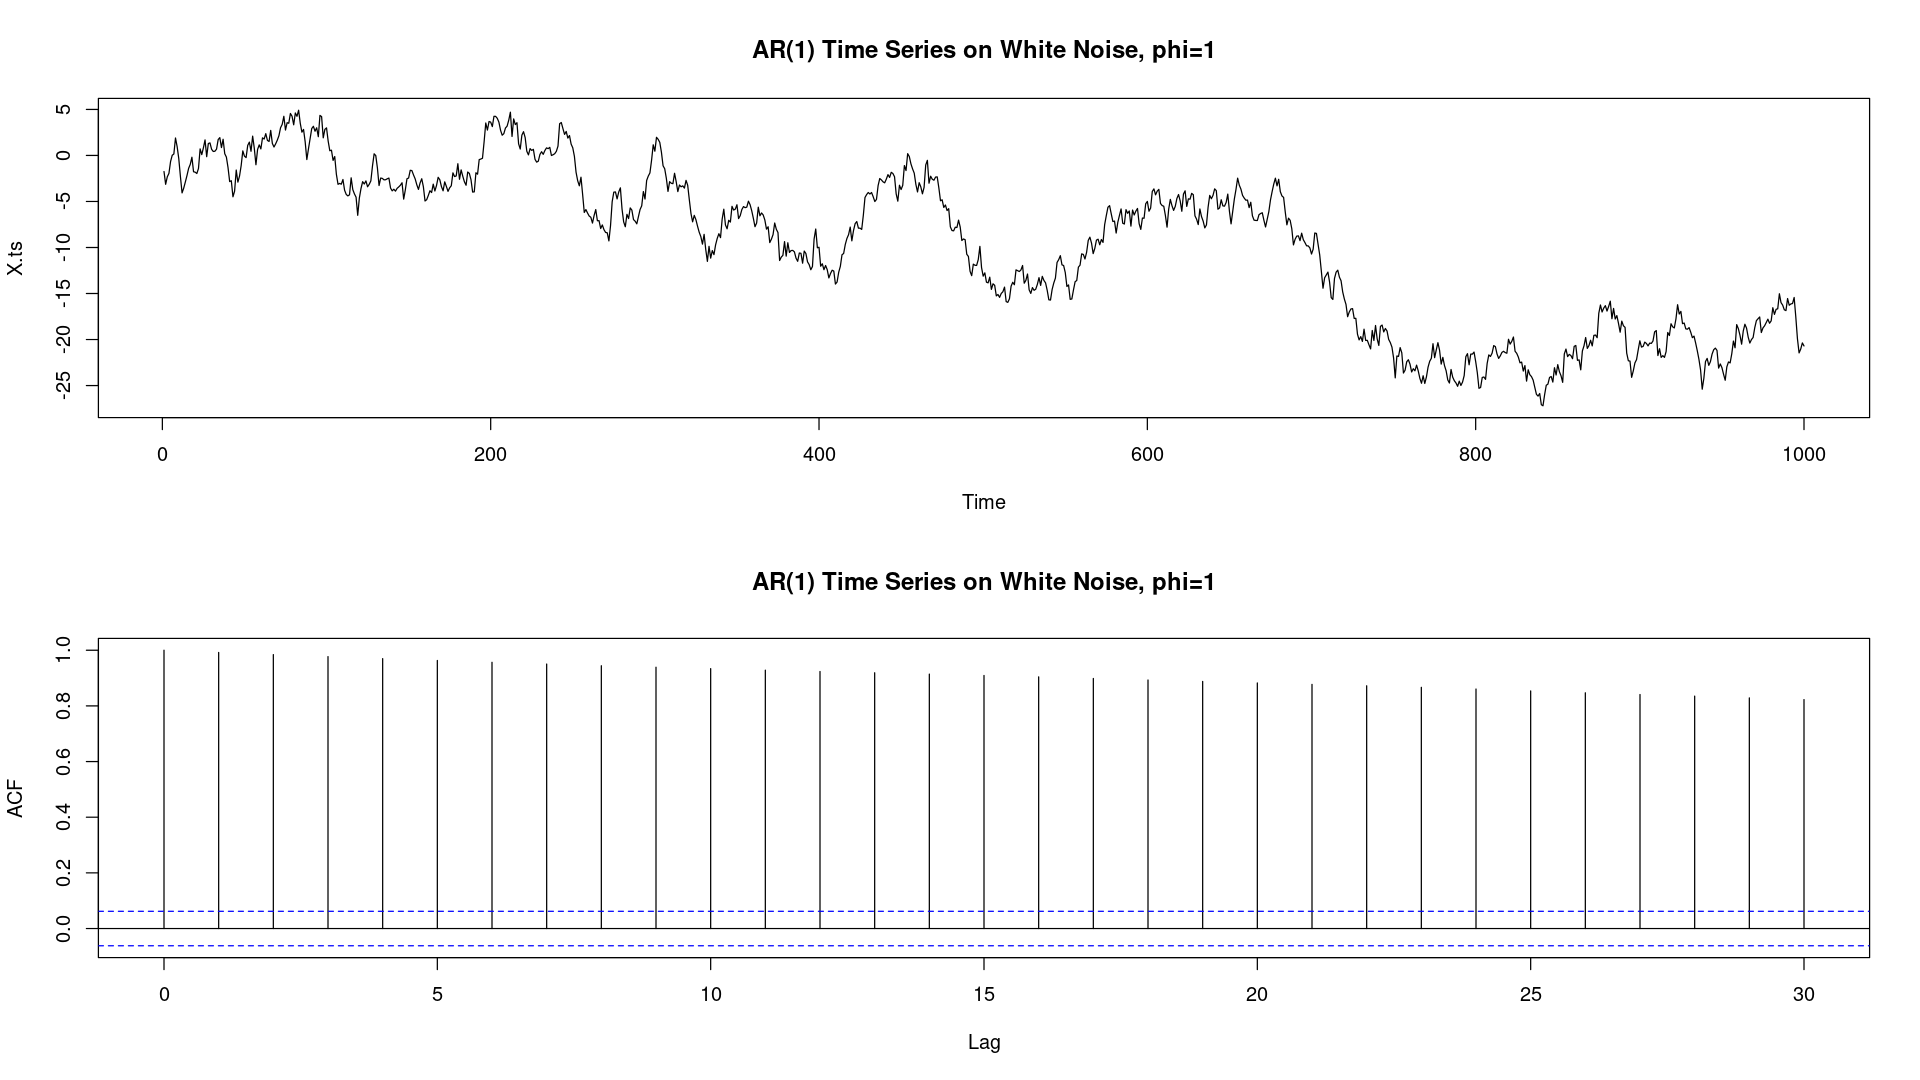

In [7]:
phi = 1;
Z = rnorm(N, 0, 1);
X = NULL;
X[1] = Z[1];

for (t in 2:N){
    X[t] = Z[t] + phi * X[t - 1];
}

X.ts = ts(X)

par(mfrow=c(2, 1))
plot(X.ts, main='AR(1) Time Series on White Noise, phi=1')
X.acf = acf(X.ts, main='AR(1) Time Series on White Noise, phi=1')

#### Simulate an AR(2)

AR(2) process: $X_t = Z_t + .7 X_{t-1} + .2 X_{t-2} $

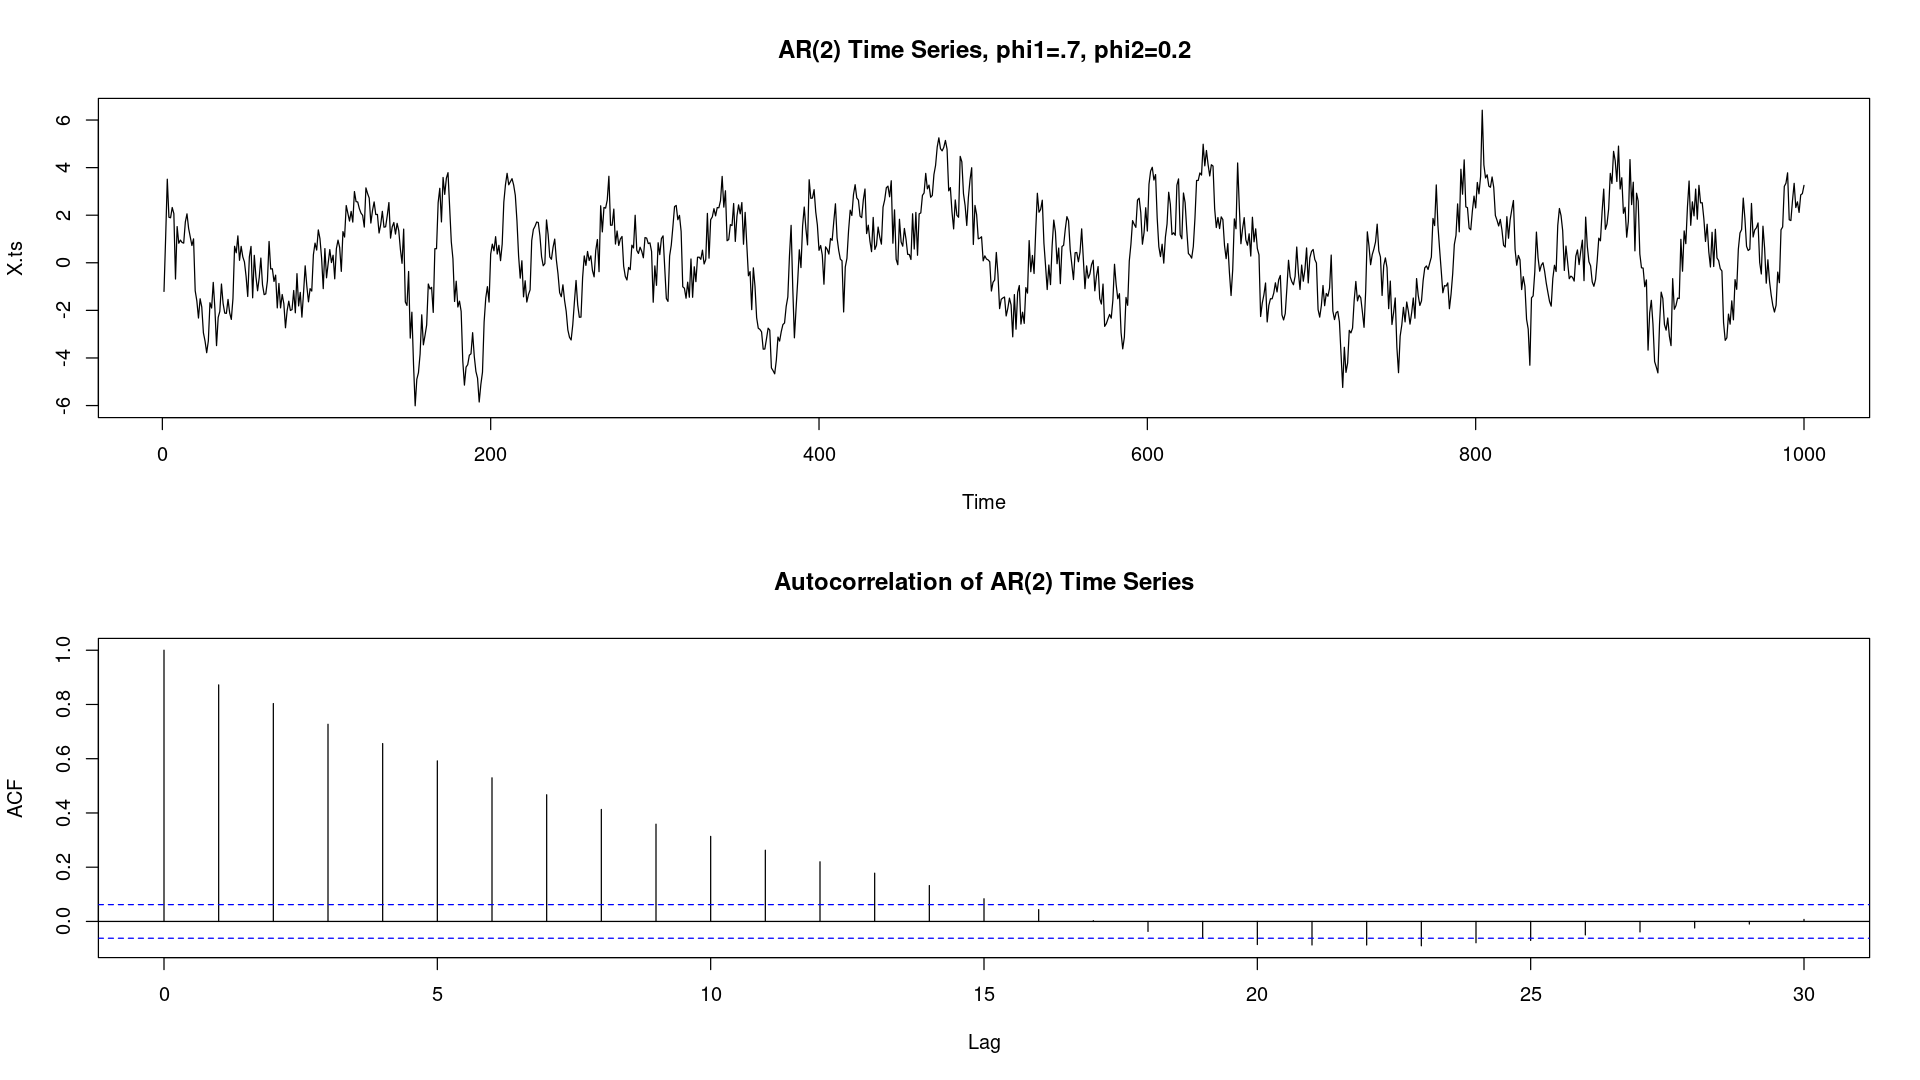

In [8]:
set.seed(2017)
X.ts <- arima.sim(list(ar=c(.7, .2)), n=1000)
par(mfrow = c(2, 1))
plot(X.ts, main="AR(2) Time Series, phi1=.7, phi2=0.2")
X.acf = acf(X.ts, main="Autocorrelation of AR(2) Time Series")

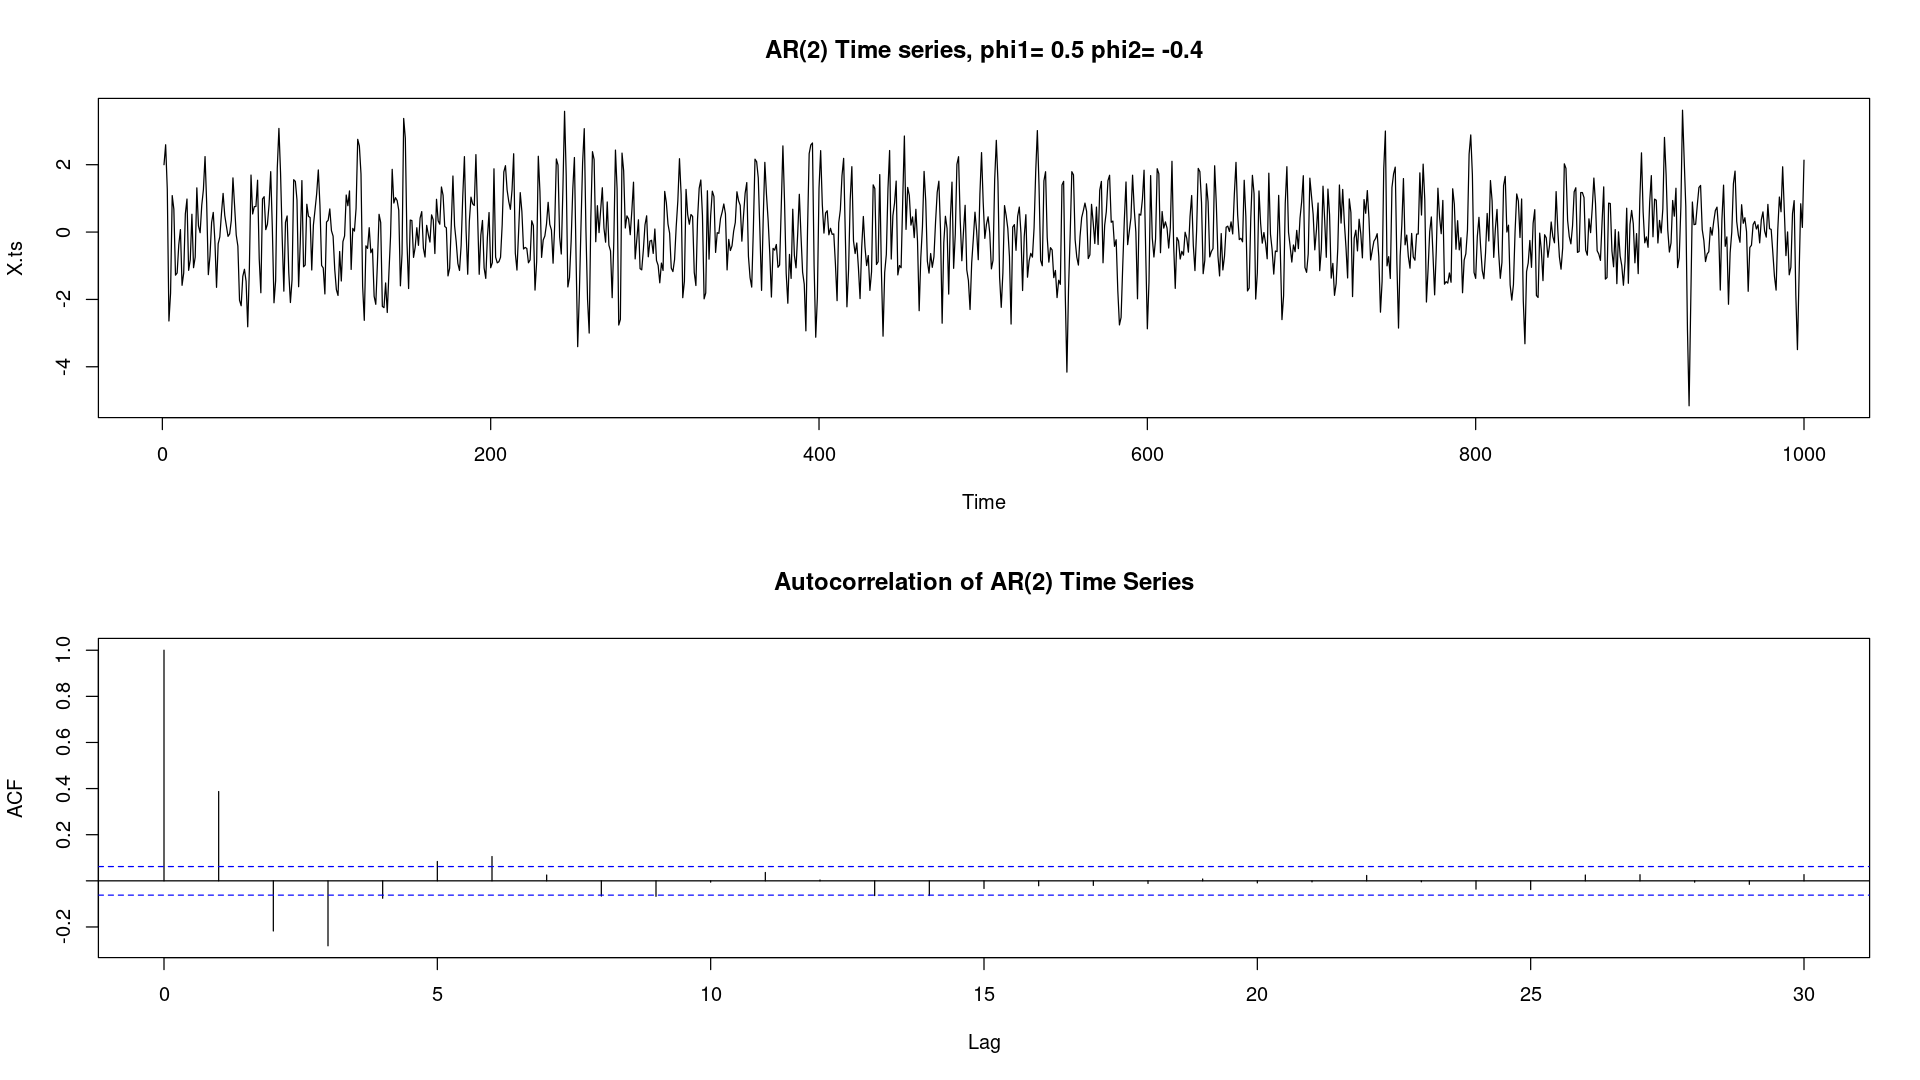

In [9]:
phi1=.5; phi2=-.4;
X.ts <- arima.sim(list(ar=c(phi1, phi2)), n=1000)
par(mfrow = c(2, 1))
plot(X.ts, main=paste("AR(2) Time series, phi1=", phi1, "phi2=",phi2))
X.acf = acf(X.ts, main="Autocorrelation of AR(2) Time Series")